<a href="https://colab.research.google.com/github/juanepstein99/DI_Bootcamp/blob/main/Week8/Day6/ExercisesXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🌟 Exercise 1 : Visualizing the Distribution of CGPA**

**Objective:**

Create a histogram to visualize the distribution of students’ CGPA.

**Dataset Overview**: The CGPA of students is categorized into different ranges. This exercise will help us understand the overall academic performance distribution among the students.

**Tasks**:
* Import necessary libraries.
* Load the dataset into a pandas DataFrame. (For the purpose of this exercise, let's assume the DataFrame is already loaded and named df).
* Use Seaborn's histplot to create a histogram of the CGPA categories.
* Customize the histogram with an appropriate color and add a title.
* Display the plot.

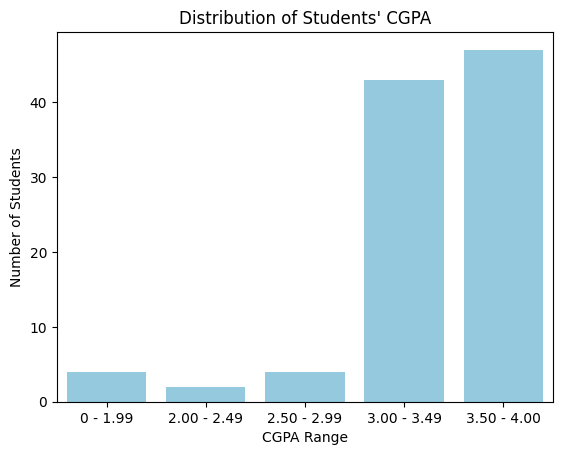

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("student_mental_health.csv")

# Define correct CGPA order
cgpa_order = [
    "0 - 1.99",
    "2.00 - 2.49",
    "2.50 - 2.99",
    "3.00 - 3.49",
    "3.50 - 4.00"
]

# Create count plot (correct column name)
plt.figure()

sns.countplot(
    data=df,
    x="What is your CGPA?",
    order=cgpa_order,
    color="skyblue"
)

# Customize plot
plt.title("Distribution of Students' CGPA")
plt.xlabel("CGPA Range")
plt.ylabel("Number of Students")

# Show plot
plt.show()


**🌟 Exercise 2: Comparing Anxiety Levels Across Different Genders**

**Objective:**

Use a bar plot to compare the proportion of students experiencing anxiety across different genders.

**Dataset Overview**: The dataset includes a 'Do you have Anxiety?' column with responses and a 'Choose your gender' column.

**Tasks:**

* Import necessary libraries.
* Assuming the dataset is loaded into df, create a bar plot using Seaborn to compare anxiety levels across genders.
* Customize your plot with an appropriate color palette.
* Add a title to your plot.
* Display the plot.

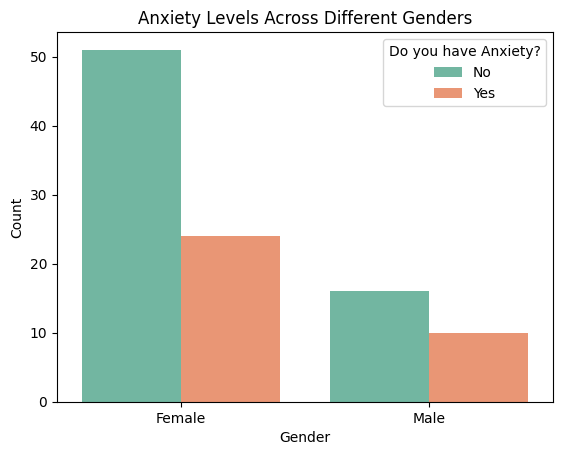

In [16]:
# Create bar plot comparing anxiety by gender
plt.figure()

sns.countplot(
    data=df,
    x="Choose your gender",
    hue="Do you have Anxiety?",
    palette="Set2"
)

# Customize plot
plt.title("Anxiety Levels Across Different Genders")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show plot
plt.show()


**🌟 Exercise 3: Exploring the Relationship Between Age and Panic Attacks**

**Objective:**

Create a scatter plot to explore if there's any visible relationship between students' age and the occurrence of panic attacks.

**Dataset Overview:** The dataset records students' ages and their responses to whether they have experienced panic attacks.

**Tasks:**

* Import necessary libraries.
* Use Seaborn's scatterplot to create a scatter plot with age on the x-axis and the occurrence of panic attacks on the y-axis. For simplicity, convert panic attack responses to numeric (e.g., Yes=1, No=0).
* Customize the scatter plot to improve readability.
* Add a title.
* Display the plot.

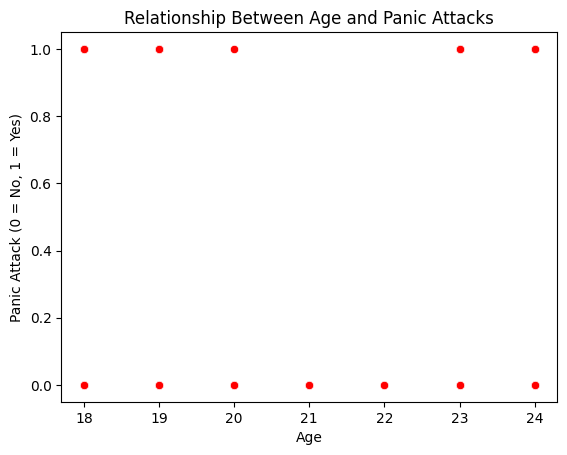

In [17]:
# Convert panic attack responses to numeric (Yes=1, No=0)
df["panic_attack_numeric"] = df["Do you have Panic attack?"].map({
    "Yes": 1,
    "No": 0
})

# Create scatter plot
plt.figure()

sns.scatterplot(
    data=df,
    x="Age",
    y="panic_attack_numeric",
    color="red"
)

# Customize plot
plt.title("Relationship Between Age and Panic Attacks")
plt.xlabel("Age")
plt.ylabel("Panic Attack (0 = No, 1 = Yes)")

# Show plot
plt.show()


**🌟 Exercise 4: Visualizing Pairwise Relationships with Seaborn Pair Plot**

**Objective:**

Utilize Seaborn's pairplot function to visualize the pairwise relationships and distributions across multiple variables in the dataset.

**Scenario:** You're interested in understanding the relationships between students' ages, CGPAs, and their mental health status regarding depression, anxiety, and panic attacks.

**Tasks:**
* Select a subset of columns relevant to the exercise: Age, CGPA, Depression, Anxiety, and Panic attacks. Assume these columns are appropriately coded as numerical values for simplicity.
* Use Seaborn's pairplot to visualize pairwise relationships and distributions.
* Customize the plot with a hue based on one of the mental health conditions to differentiate the data points.

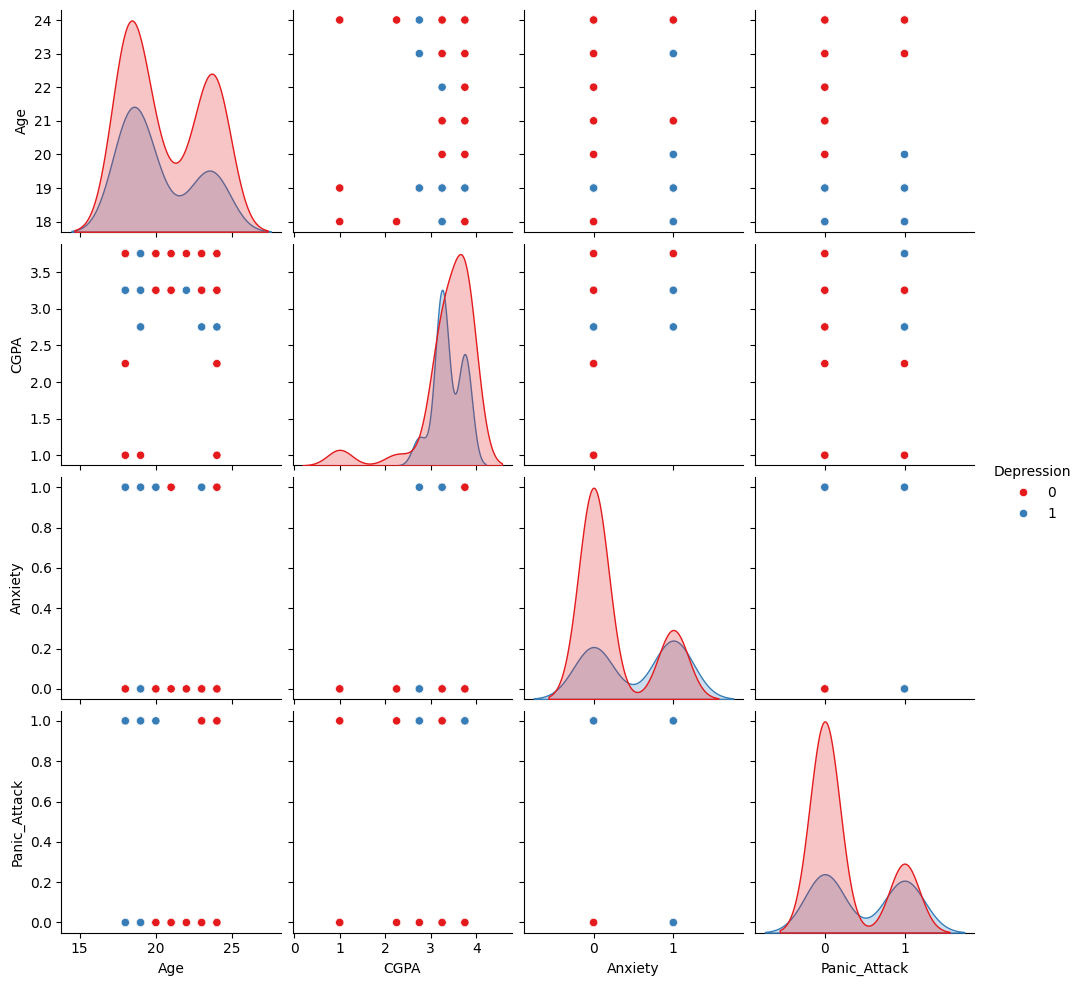

In [18]:
# Select relevant columns
df_pair = df[[
    "Age",
    "What is your CGPA?",
    "Do you have Depression?",
    "Do you have Anxiety?",
    "Do you have Panic attack?"
]].copy()

# Rename columns for easier use
df_pair = df_pair.rename(columns={
    "What is your CGPA?": "CGPA",
    "Do you have Depression?": "Depression",
    "Do you have Anxiety?": "Anxiety",
    "Do you have Panic attack?": "Panic_Attack"
})

# Convert CGPA ranges to numeric midpoint values
cgpa_map = {
    "0 - 1.99": 1.0,
    "2.00 - 2.49": 2.25,
    "2.50 - 2.99": 2.75,
    "3.00 - 3.49": 3.25,
    "3.50 - 4.00": 3.75
}

df_pair["CGPA"] = df_pair["CGPA"].map(cgpa_map)

# Convert Yes/No to numeric values
df_pair["Depression"] = df_pair["Depression"].map({"Yes": 1, "No": 0})
df_pair["Anxiety"] = df_pair["Anxiety"].map({"Yes": 1, "No": 0})
df_pair["Panic_Attack"] = df_pair["Panic_Attack"].map({"Yes": 1, "No": 0})

# Remove missing values
df_pair = df_pair.dropna()

# Create pairplot with hue based on Depression
sns.pairplot(df_pair, hue="Depression", palette="Set1")

# Show plot
plt.show()


**🌟 Exercise 5: Creating a Heatmap to Visualize Correlations**

**Objective:**

Use Seaborn to create a heatmap that visualizes the correlation matrix of students' age, CGPA, and mental health status indicators.

**Scenario:** You aim to identify any potential correlations between students' age, CGPA, and their self-reported status on depression, anxiety, and panic attacks to find patterns that might need further investigation.

**Tasks:**
* Calculate the correlation matrix for the selected subset of your dataset.
* Use Seaborn's heatmap function to visualize the correlation matrix.
* Customize the heatmap for better readability (e.g., annotating the correlation coefficients).


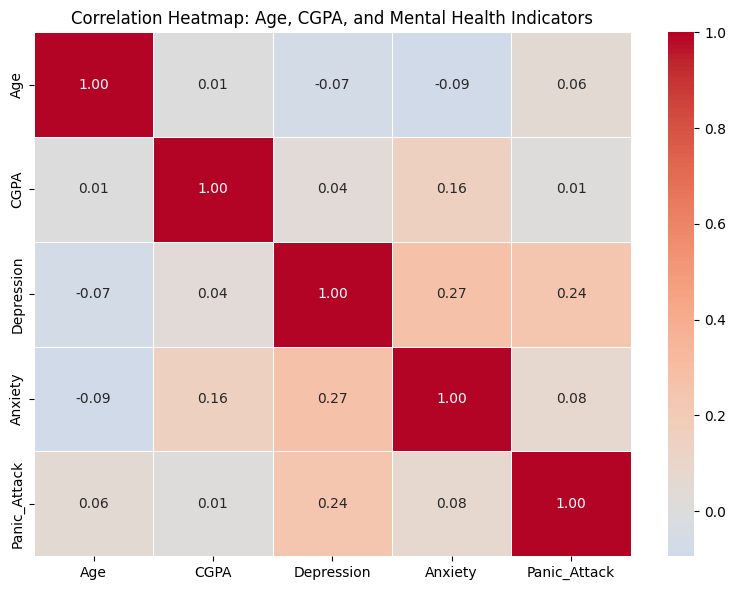

In [19]:
# Select and clean the columns we need
cols_map = {
    "Age": "Age",
    "What is your CGPA?": "CGPA",
    "Do you have Depression?": "Depression",
    "Do you have Anxiety?": "Anxiety",
    "Do you have Panic attack?": "Panic_Attack"
}

df_heat = df[list(cols_map.keys())].rename(columns=cols_map).copy()

# Convert CGPA to numeric (take the first number from ranges like "3.00 - 3.49")
df_heat["CGPA"] = (
    df_heat["CGPA"]
    .astype(str)
    .str.extract(r"(\d+\.?\d*)")[0]
)
df_heat["CGPA"] = pd.to_numeric(df_heat["CGPA"], errors="coerce")

# Convert Yes/No to 1/0 for mental health columns
yes_no_map = {"Yes": 1, "No": 0}
for c in ["Depression", "Anxiety", "Panic_Attack"]:
    df_heat[c] = df_heat[c].map(yes_no_map)

# Convert Age to numeric and drop rows with missing values
df_heat["Age"] = pd.to_numeric(df_heat["Age"], errors="coerce")
df_heat = df_heat.dropna()

# Calculate correlation matrix
corr = df_heat.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap: Age, CGPA, and Mental Health Indicators")
plt.tight_layout()
plt.show()


**🌟 Exercise 6: Analyzing Distributions and Relationships Using FacetGrid**

**Objective:**

Explore the distribution of CGPA across different levels of depression status using Seaborn's FacetGrid.

**Scenario:** You are interested in exploring how students' CGPA distributions vary among those who have reported depression versus those who haven't.

Tasks:
* Use Seaborn's FacetGrid to create a grid of histograms for CGPA, segmented by depression status.
* Map a histogram plot to each facet with appropriate customizations.
* Add titles and labels for clarity.

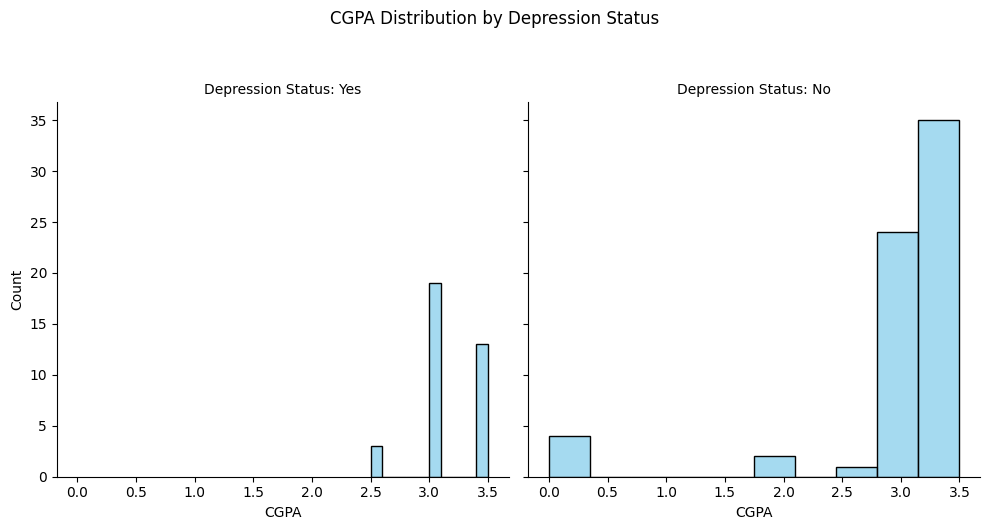

In [20]:
# Select relevant columns and rename for simplicity
df_facet = df[[
    "What is your CGPA?",
    "Do you have Depression?"
]].rename(columns={
    "What is your CGPA?": "CGPA",
    "Do you have Depression?": "Depression"
}).copy()

# Convert CGPA ranges to numeric values (take first number of range)
df_facet["CGPA"] = (
    df_facet["CGPA"]
    .astype(str)
    .str.extract(r"(\d+\.?\d*)")[0]
)

df_facet["CGPA"] = pd.to_numeric(df_facet["CGPA"], errors="coerce")

# Drop missing values
df_facet = df_facet.dropna()

# Create FacetGrid segmented by depression status
g = sns.FacetGrid(df_facet, col="Depression", height=5, aspect=1)

# Map histogram to each facet
g.map_dataframe(
    sns.histplot,
    x="CGPA",
    bins=10,
    color="skyblue",
    edgecolor="black"
)

# Add titles and labels
g.set_axis_labels("CGPA", "Count")
g.set_titles("Depression Status: {col_name}")

plt.suptitle("CGPA Distribution by Depression Status", y=1.05)
plt.tight_layout()

# Show plot
plt.show()
